## Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV



## Data

In [4]:
data = pd.read_csv('Datasets/data2.csv.gz')
data

,label,0,1,2,3,4,5,6,7,8,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
0,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
796,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
797,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
798,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Exploratory Data Analysis

In [5]:
data.shape

(800, 100001)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Columns: 100001 entries, label to 99999
dtypes: int64(100001)
memory usage: 610.4 MB


In [7]:
summary = data.describe()
summary

,label,0,1,2,3,4,5,6,7,8,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
count,800.000000,800.000000,800.0,800.000000,800.0,800.000000,800.000000,800.000000,800.000000,800.000000,...,800.000000,800.000000,800.0,800.000000,800.0,800.000000,800.000000,800.000000,800.000000,800.000000
mean,-0.805000,0.012500,0.0,0.001250,0.0,0.020000,0.003750,0.017500,0.001250,0.006250,...,0.013750,0.007500,0.0,0.001250,0.0,0.006250,0.007500,0.012500,0.006250,0.035000
std,0.593646,0.111172,0.0,0.035355,0.0,0.140088,0.061161,0.131207,0.035355,0.078859,...,0.116524,0.086331,0.0,0.035355,0.0,0.078859,0.086331,0.111172,0.078859,0.183895
min,-1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#check if the data has any null values:
print("Total missing values: ", data.isnull().sum().sum())

Total missing values:  0


In [9]:
#the first column has the target values, while the other columns are features
Y = data.iloc[:, 0]
X = data.iloc[:, 1:]

label
-1    722
 1     78
Name: count, dtype: int64


<Axes: xlabel='label', ylabel='count'>

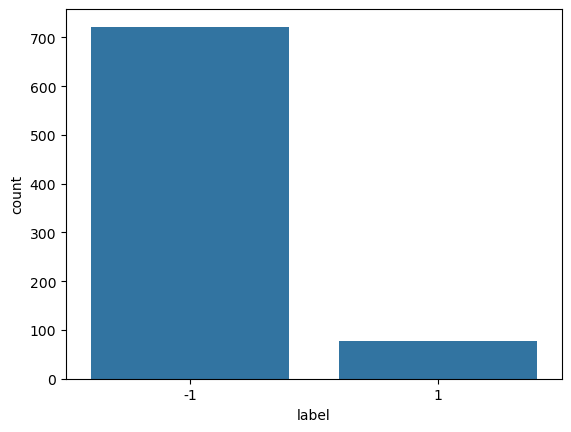

In [10]:
#check if the balance of the data:
print(Y.value_counts())
sns.countplot(x=Y)

In [11]:
print(Y.value_counts(normalize=True))

label
-1    0.9025
 1    0.0975
Name: proportion, dtype: float64


The above plot shows that the data is imbalanced and it may needs to be oversampled to handle the imbalance. Models trained on imbalanced data may become biased toward the majority class, ignoring the minority class.

In [12]:
sparsity = (X == 0).sum().sum() / (X.shape[0] * X.shape[1])
print(f"Sparsity: {sparsity * 100:.2f}%")

Sparsity: 99.09%


We split the data into train and test data: 
* setting stratify to yes ensures -> the proportion of values in the sample produced will be the same as the proportion of values provided by parameter

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [27]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## General Thresholding function

In [20]:
def thresholding(threshold, y):
    '''
    transforms the predictions based on a given threshold
    
    args : threshold
         y: predicted probabilities
        
    returns: y_predictions
    '''
    y_copy = y.copy()
    y_copy[y_copy>threshold] = 1 
    y_copy[y_copy<=threshold] = -1
    return y_copy

## Baseline Lasso
tuning alpha -> threshold set to default (=0)

In [15]:
alpha_space = np.arange(0.001,0.041,0.001)
alpha_space

array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 ])

In [18]:
alpha_scores = []
for alpha in alpha_space:
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    y_pred = lasso.predict(X_test)
    y_label = thresholding(0, y_pred)
    alpha_scores.append((alpha, balanced_accuracy_score(y_test, y_label)))
    print((alpha, balanced_accuracy_score(y_test, y_label)))

(np.float64(0.001), np.float64(0.7673611111111112))
(np.float64(0.002), np.float64(0.8020833333333333))
(np.float64(0.003), np.float64(0.7986111111111112))
(np.float64(0.004), np.float64(0.8020833333333333))
(np.float64(0.005), np.float64(0.8020833333333333))
(np.float64(0.006), np.float64(0.8020833333333333))
(np.float64(0.007), np.float64(0.8020833333333333))
(np.float64(0.008), np.float64(0.8055555555555556))
(np.float64(0.009000000000000001), np.float64(0.7743055555555556))
(np.float64(0.01), np.float64(0.7777777777777778))
(np.float64(0.011), np.float64(0.7777777777777778))
(np.float64(0.012), np.float64(0.7777777777777778))
(np.float64(0.013000000000000001), np.float64(0.7777777777777778))
(np.float64(0.014), np.float64(0.7777777777777778))
(np.float64(0.015), np.float64(0.7777777777777778))
(np.float64(0.016), np.float64(0.7777777777777778))
(np.float64(0.017), np.float64(0.7465277777777778))
(np.float64(0.018000000000000002), np.float64(0.7465277777777778))
(np.float64(0.019), 

## Lasso with Threshold tuning

In [21]:
thresholds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9]
alpha_space = np.arange(0.005, 0.05, 0.002)

In [32]:
#Here both alpha and the threshold are tuned:

def lasso_alpha (alpha, kf_splits = 5, X_train = X_train, y_train=y_train, thresholds=thresholds):
    '''
    this function for a given alpha, it tunes the set of thresholds using Kfolds cross validation
    '''

    kf = KFold(kf_splits)
    
    fold_optimal = []
    for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        x_train_cv = X_train[train_index, :]
        x_test_cv = X_train[test_index,:]
        y_train_cv = y_train.iloc[train_index]
        y_test_cv = y_train.iloc[test_index]
        lasso = Lasso(alpha)
        lasso.fit(x_train_cv, y_train_cv)
        y_pred = lasso.predict(x_test_cv)
        #print(y_pred)
        fold_scores = []
        for threshold in thresholds:
            y_label = thresholding(threshold, y_pred)
            fold_scores.append(balanced_accuracy_score(y_test_cv, y_label))
        #print(fold_scores)
        fold_optimal.append(thresholds[np.argmax(fold_scores)])
    return np.average(fold_optimal)

In [35]:
balanced_scores = []
for alpha in alpha_space:
    optimal_threshold = lasso_alpha(alpha, X_train=X_train,y_train=y_train)
    lasso = Lasso(alpha)
    lasso.fit(X_train, y_train)

    y_predict = lasso.predict(X_test)
    y_label = thresholding(optimal_threshold,y_predict)
    num_selected_features = X_train[:, lasso.coef_!=0].shape[1]
    
    balanced_scores.append((alpha, balanced_accuracy_score(y_test, y_label), num_selected_features))
    print((alpha, balanced_accuracy_score(y_test, y_label), num_selected_features))


(np.float64(0.005), np.float64(0.8506944444444444), 181)
(np.float64(0.007), np.float64(0.8576388888888888), 102)
(np.float64(0.009000000000000001), np.float64(0.8576388888888888), 62)
(np.float64(0.011), np.float64(0.8576388888888888), 34)
(np.float64(0.013000000000000001), np.float64(0.8645833333333333), 20)
(np.float64(0.015), np.float64(0.8333333333333333), 11)
(np.float64(0.017), np.float64(0.8368055555555556), 7)
(np.float64(0.019), np.float64(0.8368055555555556), 6)
(np.float64(0.021), np.float64(0.8368055555555556), 6)
(np.float64(0.023), np.float64(0.7743055555555556), 5)
(np.float64(0.025), np.float64(0.7743055555555556), 4)
(np.float64(0.027), np.float64(0.8333333333333333), 4)
(np.float64(0.029), np.float64(0.8333333333333333), 4)
(np.float64(0.031), np.float64(0.8333333333333333), 4)
(np.float64(0.033), np.float64(0.8333333333333333), 3)
(np.float64(0.035), np.float64(0.8333333333333333), 3)
(np.float64(0.037), np.float64(0.8368055555555556), 3)
(np.float64(0.039), np.floa

In [22]:
df = pd.DataFrame(balanced_scores, columns=['Alpha', 'Balanced score', 'No. Features'])
df

,Alpha,Balanced score,No. Features
0,0.005,0.854167,181
1,0.007,0.857639,102
2,0.009,0.857639,62
3,0.011,0.857639,34
4,0.013,0.864583,20
5,0.015,0.833333,11
6,0.017,0.833333,7
7,0.019,0.833333,6
8,0.021,0.833333,6
9,0.023,0.833333,5


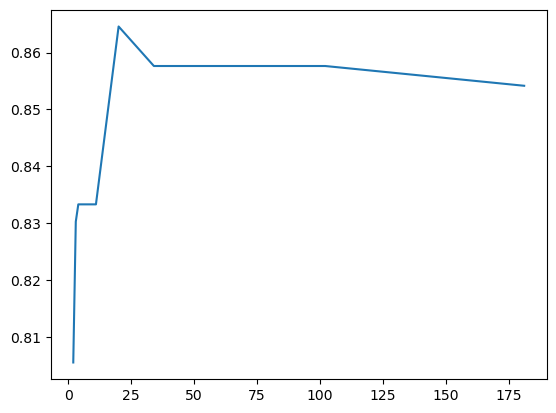

In [23]:
df_badly_averaged = df.groupby('No. Features',as_index=False).mean()
plt.plot(df_badly_averaged['No. Features'], df_badly_averaged['Balanced score'])

## Lasso and SVM

In [24]:
#Baseline SVC with lasso for feature selection
# testing class weitgh 'None' vs 'balanced'
# with balanced it gives the best balanced accuracy with 7 features selected

balanced_scores = []
for alpha in alpha_space:
    lasso = Lasso(alpha)
    lasso.fit(X_train, y_train)
    # Get the columns with non zro coefficients from lasso
    x_train_subset = X_train.values[:, lasso.coef_!=0]
    x_test_subset = X_test.values[:, lasso.coef_!=0]
    num_selected_features = X_train.values[:, lasso.coef_!=0].shape[1]
    #Train svm on selected features.
    svm = SVC(probability=True, class_weight='balanced')
    svm.fit(x_train_subset, y_train)
    #Test accuracy metrics.
    y_pred = svm.predict(x_test_subset)

    balanced_scores.append((alpha, balanced_accuracy_score(y_test, y_pred), num_selected_features))
    print((alpha, balanced_accuracy_score(y_test, y_pred), num_selected_features))


(0.005, 0.7465277777777778, 181)
(0.007, 0.8402777777777778, 102)
(0.009000000000000001, 0.8055555555555556, 62)
(0.011, 0.8263888888888888, 34)
(0.013000000000000001, 0.8923611111111112, 20)
(0.015, 0.8506944444444444, 11)
(0.017, 0.9166666666666667, 7)
(0.019, 0.8854166666666667, 6)
(0.021, 0.8854166666666667, 6)
(0.023000000000000003, 0.8854166666666667, 5)
(0.025, 0.8645833333333333, 4)
(0.027, 0.8645833333333333, 4)
(0.029, 0.8645833333333333, 4)
(0.031000000000000003, 0.8645833333333333, 4)
(0.033, 0.8333333333333333, 3)
(0.034999999999999996, 0.8333333333333333, 3)
(0.037, 0.8333333333333333, 3)
(0.039, 0.8333333333333333, 3)
(0.041, 0.8333333333333333, 3)
(0.043, 0.8333333333333333, 3)
(0.045, 0.8333333333333333, 3)
(0.047, 0.8333333333333333, 3)
(0.048999999999999995, 0.8333333333333333, 2)


In [25]:
thresholds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
def threshold_model (model=SVC(probability=True), kf_splits = 5, X_train = X_train, y_train=y_train, thresholds=thresholds):
    kf = KFold(kf_splits)
    
    fold_optimal = []
    for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        #cv splitting
        x_train_cv = X_train[train_index, :]
        x_test_cv = X_train[test_index,:]
        y_train_cv = y_train.iloc[train_index]
        y_test_cv = y_train.iloc[test_index]
        #model fit and predict for any model with predict proba

        model.fit(x_train_cv, y_train_cv)
        # This is now returning an array probabilit of class 1, prob class 2
        y_pred = model.predict_proba(x_test_cv)[:,1] #first column is the probabilities of the negative class
        #print(y_pred)
        fold_scores = []
        for threshold in thresholds:
            y_label = thresholding(threshold, y_pred)
            #print(y_label)
            fold_scores.append(balanced_accuracy_score(y_test_cv, y_label))
        #print(fold_scores)
        fold_optimal.append(thresholds[np.argmax(fold_scores)])
    return np.average(fold_optimal)

In [26]:
new_alphas = np.arange(0.009,0.020,0.0001)
new_alphas

array([0.009 , 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096, 0.0097,
       0.0098, 0.0099, 0.01  , 0.0101, 0.0102, 0.0103, 0.0104, 0.0105,
       0.0106, 0.0107, 0.0108, 0.0109, 0.011 , 0.0111, 0.0112, 0.0113,
       0.0114, 0.0115, 0.0116, 0.0117, 0.0118, 0.0119, 0.012 , 0.0121,
       0.0122, 0.0123, 0.0124, 0.0125, 0.0126, 0.0127, 0.0128, 0.0129,
       0.013 , 0.0131, 0.0132, 0.0133, 0.0134, 0.0135, 0.0136, 0.0137,
       0.0138, 0.0139, 0.014 , 0.0141, 0.0142, 0.0143, 0.0144, 0.0145,
       0.0146, 0.0147, 0.0148, 0.0149, 0.015 , 0.0151, 0.0152, 0.0153,
       0.0154, 0.0155, 0.0156, 0.0157, 0.0158, 0.0159, 0.016 , 0.0161,
       0.0162, 0.0163, 0.0164, 0.0165, 0.0166, 0.0167, 0.0168, 0.0169,
       0.017 , 0.0171, 0.0172, 0.0173, 0.0174, 0.0175, 0.0176, 0.0177,
       0.0178, 0.0179, 0.018 , 0.0181, 0.0182, 0.0183, 0.0184, 0.0185,
       0.0186, 0.0187, 0.0188, 0.0189, 0.019 , 0.0191, 0.0192, 0.0193,
       0.0194, 0.0195, 0.0196, 0.0197, 0.0198, 0.0199])

In [27]:
balanced_scores = []
for alpha in new_alphas:
    lasso = Lasso(alpha)
    lasso.fit(X_train, y_train)

    #the selected features with lasso
    num_selected_features = X_train.values[:, lasso.coef_!=0].shape[1]

    # Get the columns with non zro coefficients from lasso
    x_train_subset = X_train.values[:, lasso.coef_!=0]
    x_test_subset = X_test.values[:, lasso.coef_!=0]

    #initialise the model
    svm = SVC(probability=True)

    #tune the threshold
    optimal_threshold = threshold_model(model=svm, X_train=x_train_subset)

    
    #Train svm on selected features.
    svm.fit(x_train_subset, y_train)

    #Test accuracy metrics.
    y_pred = svm.predict_proba(x_test_subset)[:,1]
    y_label = thresholding(optimal_threshold,y_pred)

    balanced_scores.append((alpha, balanced_accuracy_score(y_test, y_label), num_selected_features))
    print((alpha, balanced_accuracy_score(y_test, y_label), num_selected_features))

(0.009, 0.8055555555555556, 62)
(0.009099999999999999, 0.8368055555555556, 61)
(0.009199999999999998, 0.8125, 60)
(0.009299999999999998, 0.84375, 57)
(0.009399999999999997, 0.84375, 52)
(0.009499999999999996, 0.8472222222222222, 50)
(0.009599999999999996, 0.8472222222222222, 47)
(0.009699999999999995, 0.84375, 44)
(0.009799999999999994, 0.84375, 43)
(0.009899999999999994, 0.84375, 43)
(0.009999999999999993, 0.8506944444444444, 42)
(0.010099999999999993, 0.8576388888888888, 41)
(0.010199999999999992, 0.8576388888888888, 41)
(0.010299999999999991, 0.8611111111111112, 39)
(0.01039999999999999, 0.8576388888888888, 39)
(0.01049999999999999, 0.8611111111111112, 38)
(0.01059999999999999, 0.8611111111111112, 38)
(0.010699999999999989, 0.8611111111111112, 38)
(0.010799999999999988, 0.8576388888888888, 36)
(0.010899999999999988, 0.8541666666666667, 34)
(0.010999999999999987, 0.8611111111111112, 34)
(0.011099999999999987, 0.8541666666666667, 34)
(0.011199999999999986, 0.8576388888888888, 33)
(0.0

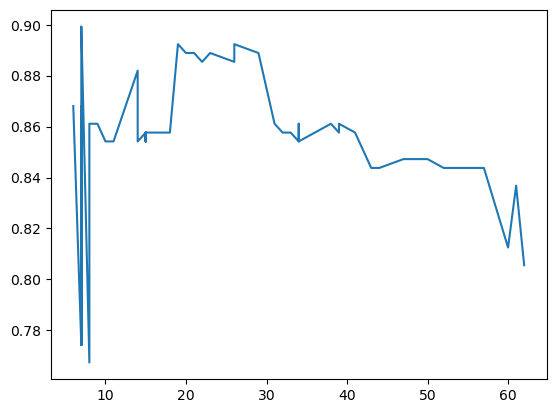

In [28]:
svc_fine_threshold = pd.DataFrame(balanced_scores,columns=['alpha','test_acc','features'])
plt.plot(svc_fine_threshold['features'], svc_fine_threshold['test_acc'])


In [29]:
# tryig the same above model but this time the svm class_weight set to balanced instead of None

balanced_scores = []
for alpha in new_alphas:
    lasso = Lasso(alpha)
    lasso.fit(X_train, y_train)

    #the selected features with lasso
    num_selected_features = X_train.values[:, lasso.coef_!=0].shape[1]

    # Get the columns with non zro coefficients from lasso
    x_train_subset = X_train.values[:, lasso.coef_!=0]
    x_test_subset = X_test.values[:, lasso.coef_!=0]

    #initialise the model
    svm = SVC(probability=True, class_weight='balanced') #adding balanced here

    #tune the threshold
    optimal_threshold = threshold_model(model=svm, X_train=x_train_subset)

    
    #Train svm on selected features.
    svm.fit(x_train_subset, y_train)

    #Test accuracy metrics.
    y_pred = svm.predict_proba(x_test_subset)[:,1]
    y_label = thresholding(optimal_threshold,y_pred)

    balanced_scores.append((alpha, balanced_accuracy_score(y_test, y_label), num_selected_features))
    print((alpha, balanced_accuracy_score(y_test, y_label), num_selected_features))

(0.009, 0.8541666666666667, 62)
(0.009099999999999999, 0.8333333333333333, 61)
(0.009199999999999998, 0.8402777777777778, 60)
(0.009299999999999998, 0.84375, 57)
(0.009399999999999997, 0.84375, 52)
(0.009499999999999996, 0.8472222222222222, 50)
(0.009599999999999996, 0.8368055555555556, 47)
(0.009699999999999995, 0.8402777777777778, 44)
(0.009799999999999994, 0.8506944444444444, 43)
(0.009899999999999994, 0.8506944444444444, 43)
(0.009999999999999993, 0.8576388888888888, 42)
(0.010099999999999993, 0.8541666666666667, 41)
(0.010199999999999992, 0.8541666666666667, 41)
(0.010299999999999991, 0.8541666666666667, 39)
(0.01039999999999999, 0.8541666666666667, 39)
(0.01049999999999999, 0.8541666666666667, 38)
(0.01059999999999999, 0.8541666666666667, 38)
(0.010699999999999989, 0.8541666666666667, 38)
(0.010799999999999988, 0.8229166666666667, 36)
(0.010899999999999988, 0.8229166666666667, 34)
(0.010999999999999987, 0.8229166666666667, 34)
(0.011099999999999987, 0.8229166666666667, 34)
(0.011

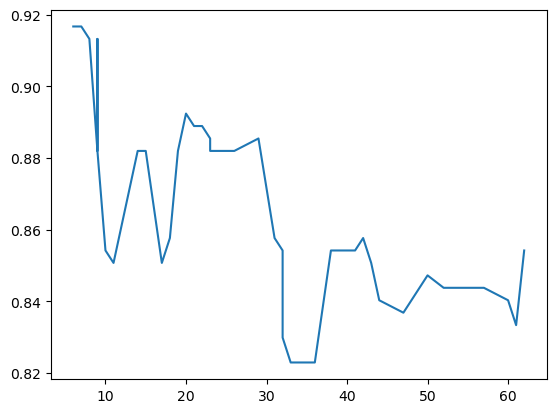

In [30]:
svc_fine_threshold = pd.DataFrame(balanced_scores,columns=['alpha','test_acc','features'])
plt.plot(svc_fine_threshold['features'], svc_fine_threshold['test_acc'])

## Baseline Random Forest

In [ ]:
x_trial = X_train.iloc[:, :10000]
rf = RandomForestClassifier()

In [ ]:
sfs_trial = sfs(
    k_features=5,
    estimator=rf,
    forward=True,                 # Perform forward selection
    floating=False,               # Disable dynamic feature adjustment
    scoring='balanced_accuracy',  # Metric for feature subset evaluation
    cv=10,                         # 5-fold cross-validation
    n_jobs=-1,                    # Use all CPU cores
    verbose=2                     # Display progress
)

In [ ]:
sfs_trial = sfs_trial.fit(x_train_lasso, y_train)

In [ ]:
# Transform the dataset to include only selected features
X_train_selected = sfs_trial.transform(x_train_lasso)
X_test_selected = sfs_trial.transform(x_test_lasso)

rf = RandomForestClassifier()

rf.fit(X_train_selected, y_train)
y_pred = rf.predict(X_test_selected)


balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(balanced_accuracy)

## Lasso and Ada Boost:

In [ ]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)
x_train_lasso = X_train.values[:, lasso.coef_!=0]
x_test_lasso = X_test.values[:, lasso.coef_!=0]

In [ ]:
#we use the same train and test set based on lasso coeffecient

ada = AdaBoostClassifier(n_estimators=1000)
ada.fit(x_train_lasso, y_train)

y_pred = ada.predict(x_test_lasso)
print(balanced_accuracy_score(y_test, y_pred))